# Analisis Exploratorio

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
heart_disease = fetch_ucirepo(id=45) 

x = heart_disease.data.features 
y = heart_disease.data.targets 
  
frames = [x, y]
all_data = pd.concat(
    [x.reset_index(drop=True), y.reset_index(drop=True)],
    axis=1,
    join='inner'     # asegura intersección de índices
)

# Renombrar columnas a español
all_data = all_data.rename(columns={
    "age": "edad",
    "sex": "sexo",
    "cp": "dolor_pecho",
    "trestbps": "presion_reposo",
    "chol": "colesterol",
    "fbs": "azucar_ayunas",
    "restecg": "ecg_reposo",
    "thalach": "freq_cardiaca_max",
    "exang": "angina_ejercicio",
    "oldpeak": "depresion_st",
    "slope": "pendiente_st",
    "ca": "vasos_coloreados",
    "thal": "talio",
    "num": "enfermedad_cardiaca"
})

print('All data shape: ', all_data.shape)
all_data.head()

All data shape:  (303, 14)


,edad,sexo,dolor_pecho,presion_reposo,colesterol,azucar_ayunas,ecg_reposo,freq_cardiaca_max,angina_ejercicio,depresion_st,pendiente_st,vasos_coloreados,talio,enfermedad_cardiaca
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   edad                 303 non-null    int64  
 1   sexo                 303 non-null    int64  
 2   dolor_pecho          303 non-null    int64  
 3   presion_reposo       303 non-null    int64  
 4   colesterol           303 non-null    int64  
 5   azucar_ayunas        303 non-null    int64  
 6   ecg_reposo           303 non-null    int64  
 7   freq_cardiaca_max    303 non-null    int64  
 8   angina_ejercicio     303 non-null    int64  
 9   depresion_st         303 non-null    float64
 10  pendiente_st         303 non-null    int64  
 11  vasos_coloreados     299 non-null    float64
 12  talio                301 non-null    float64
 13  enfermedad_cardiaca  303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [4]:
all_data.describe()

,edad,sexo,dolor_pecho,presion_reposo,colesterol,azucar_ayunas,ecg_reposo,freq_cardiaca_max,angina_ejercicio,depresion_st,pendiente_st,vasos_coloreados,talio,enfermedad_cardiaca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


##  Diccionario de variables

## Variables Numéricas

| Variable            | Descripción                                                       | Unidades / Rango |
|---------------------|-------------------------------------------------------------------|------------------|
| **edad**            | Edad del paciente                                                 | años             |
| **presion_reposo**  | Presión arterial en reposo                                        | mm Hg            |
| **colesterol**      | Colesterol sérico                                                 | mg/dl            |
| **freq_cardiaca_max** | Frecuencia cardíaca máxima alcanzada                             | —                |
| **depresion_st**    | Depresión del segmento ST inducida por ejercicio (vs reposo)      | valor decimal    |
| **vasos_coloreados** | Número de vasos principales coloreados por fluoroscopía           | 0–3              |

---

##  Variables Categóricas

| Variable            | Descripción                                    | Categorías |
|---------------------|------------------------------------------------|------------|
| **sexo**            | Sexo del paciente                              | 1 = hombre, 0 = mujer |
| **dolor_pecho**     | Tipo de dolor en el pecho                      | 1 = angina típica, 2 = angina atípica, 3 = dolor no anginoso, 4 = asintomático |
| **azucar_ayunas**   | Azúcar en ayunas > 120 mg/dl                   | 1 = sí, 0 = no |
| **ecg_reposo**      | Resultados del electrocardiograma en reposo    | 0 = normal, 1 = anomalía ST-T, 2 = hipertrofia ventricular izquierda |
| **angina_ejercicio**| Angina inducida por ejercicio                  | 1 = sí, 0 = no |
| **pendiente_st**    | Pendiente del segmento ST en el ECG de esfuerzo | 1 = ascendente, 2 = plana, 3 = descendente |
| **talio**           | Resultado de la prueba de talio (*thalassemia*) | 3 = normal, 6 = defecto fijo, 7 = defecto reversible |

---

##  Variable Objetivo

| Variable                | Descripción                          | Categorías |
|--------------------------|--------------------------------------|------------|
| **enfermedad_cardiaca** | Diagnóstico de enfermedad cardíaca   | 0 = sano, 1–4 = distintos grados de enfermedad |


In [5]:
null_counts = all_data.isnull().sum()
null_columns = null_counts[null_counts > 0]

if not null_columns.empty:
    print("Columnas con valores nulos:")
    print(null_columns)
else:
    print("No hay valores nulos en la DataBase.")

Columnas con valores nulos:
vasos_coloreados    4
talio               2
dtype: int64


##  Tratamiento de datos faltantes

Tras analizar el dataset, se identificaron los siguientes valores faltantes:

- **vasos_coloreados** → 4 valores faltantes  
- **talio** → 2 valores faltantes  
- Todas las demás variables → 0 valores faltantes  

En total, el dataset contiene **6 valores faltantes** distribuidos únicamente en esas dos variables.


In [6]:
print("Índices con NaN en vasos_coloreados:", all_data[all_data['vasos_coloreados'].isna()].index.tolist())
print("Índices con NaN en talio:", all_data[all_data['talio'].isna()].index.tolist())

Índices con NaN en vasos_coloreados: [166, 192, 287, 302]
Índices con NaN en talio: [87, 266]


In [7]:
all_data["vasos_coloreados"] = all_data["vasos_coloreados"].fillna(all_data["vasos_coloreados"].mode()[0])
all_data["talio"] = all_data["talio"].fillna(all_data["talio"].mode()[0])
print(all_data.isna().sum())

edad                   0
sexo                   0
dolor_pecho            0
presion_reposo         0
colesterol             0
azucar_ayunas          0
ecg_reposo             0
freq_cardiaca_max      0
angina_ejercicio       0
depresion_st           0
pendiente_st           0
vasos_coloreados       0
talio                  0
enfermedad_cardiaca    0
dtype: int64


Para las variables con datos faltantes, los cuales eran muy pocos se utilizó imputación por moda, asignando el valor más común dentro de cada columna como sustituto de los valores ausentes.

### Cambio de valores en variable objetivo
En el dataset original, enfermedad_cardiaca puede tomar valores:

0 → paciente sano

1–4 → distintos grados de enfermedad

Para objetivo de este projecto cambiemos estas variables por 0 y 1 respectivamente,

0 → **No** tiene enfermedad

1 → **Si** tiene enfermedad

In [8]:
# Convertir la variable objetivo a binaria
all_data["enfermedad_cardiaca"] = (all_data["enfermedad_cardiaca"] > 0).astype(int)

# Verificar los valores únicos
print(all_data["enfermedad_cardiaca"].value_counts())
all_data.head()

enfermedad_cardiaca
0    164
1    139
Name: count, dtype: int64


,edad,sexo,dolor_pecho,presion_reposo,colesterol,azucar_ayunas,ecg_reposo,freq_cardiaca_max,angina_ejercicio,depresion_st,pendiente_st,vasos_coloreados,talio,enfermedad_cardiaca
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


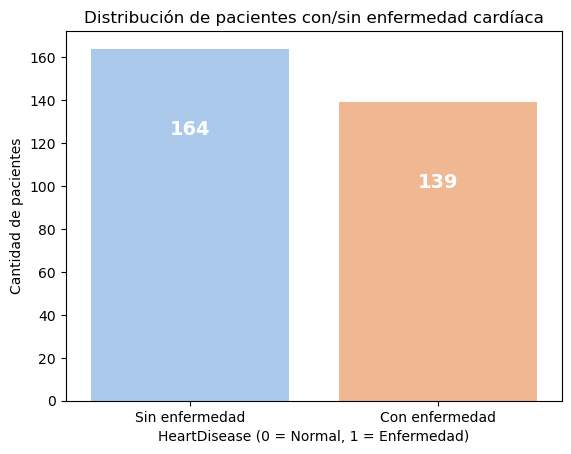

In [9]:
# 1 Distribución de pacientes con/sin enfermedad cardíaca
labels = (all_data['enfermedad_cardiaca'].value_counts())

ax = sns.countplot(x = 'enfermedad_cardiaca', data = all_data, palette="pastel")
plt.xticks(np.arange(2), ['Sin enfermedad', 'Con enfermedad'])
plt.title("Distribución de pacientes con/sin enfermedad cardíaca")
plt.xlabel("HeartDisease (0 = Normal, 1 = Enfermedad)")
plt.ylabel("Cantidad de pacientes")

for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold');

In [10]:
labels

enfermedad_cardiaca
0    164
1    139
Name: count, dtype: int64

De un total de 303 personas, 164 (54.1%) están sanas y 139 (45.8%) presentan enfermedad cardíaca.
Esto refleja un ligero desbalance en las clases, aunque la diferencia no es significativa, por lo que podemos considerar que el conjunto de datos está razonablemente balanceado y resulta adecuado para el análisis predictivo.

Text(0, 0.5, 'Frecuencia')

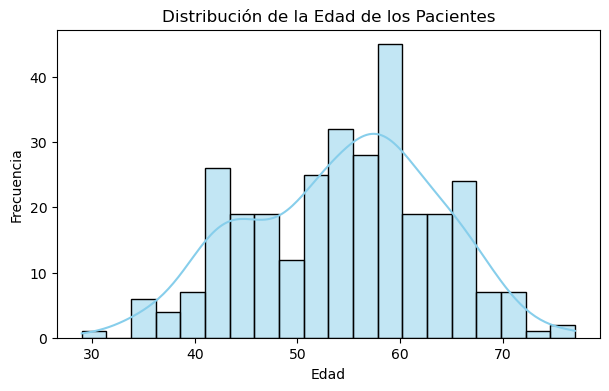

In [11]:
# 2. Distribución de la edad
plt.figure(figsize=(7,4))
sns.histplot(all_data["edad"], bins=20, kde=True, color="skyblue")
plt.title("Distribución de la Edad de los Pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")


La edad de los pacientes varía entre un rango amplio (aprox. 28 a 77 años), con una media cercana a los 55 años. La mayor concentración de casos se encuentra en edades medias y avanzadas, lo que concuerda con la literatura médica sobre mayor riesgo cardiovascular en etapas adultas.

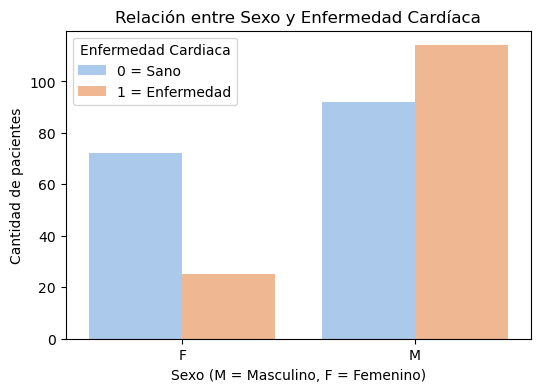

In [12]:

# 3. Relación Sexo - Enfermedad cardíaca
plt.figure(figsize=(6,4))
ax=sns.countplot(x="sexo", hue="enfermedad_cardiaca", data=all_data, palette="pastel")
ax.set_xticks([0,1])
ax.set_xticklabels(['F','M'])
plt.title("Relación entre Sexo y Enfermedad Cardíaca")
plt.xlabel("Sexo (M = Masculino, F = Femenino)")
plt.ylabel("Cantidad de pacientes")
plt.legend(title="Enfermedad Cardiaca", labels=["0 = Sano", "1 = Enfermedad"])
plt.show()

La prevalencia de la enfermedad es mayor en hombres que en mujeres, y se observa una proporción relevante de casos positivos.

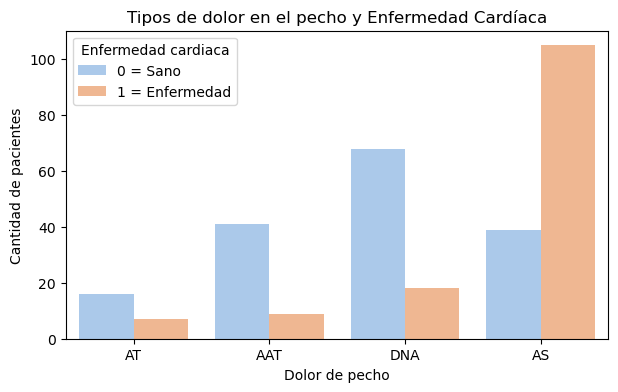

In [13]:
# 4. Tipos de dolor en el pecho (ChestPainType) vs HeartDisease
plt.figure(figsize=(7,4))
ax=sns.countplot(x="dolor_pecho", hue="enfermedad_cardiaca", data=all_data, palette="pastel")
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['AT','AAT','DNA','AS'])
plt.title("Tipos de dolor en el pecho y Enfermedad Cardíaca")
plt.xlabel("Dolor de pecho")
plt.ylabel("Cantidad de pacientes")
plt.legend(title="Enfermedad cardiaca", labels=["0 = Sano", "1 = Enfermedad"])
plt.show()

Aunque médicamente se suele asociar la presencia de síntomas con un mayor riesgo, el análisis nos revela que el grupo de pacientes asintomáticos (ASY) es el que presenta la mayor cantidad de diagnósticos positivos de enfermedad cardíaca, lo que subraya la importancia crucial de las evaluaciones preventivas incluso en ausencia de dolor en el pecho. Por el contrario, los grupos con angina atípica (ATA) y dolor no anginoso (NAP) predominan en pacientes sanos, mientras que la angina típica (TA) tiene una frecuencia general baja, lo que desafía las expectativas tradicionales y enfatiza que la falta de síntomas no descarta la presencia de la enfermedad.

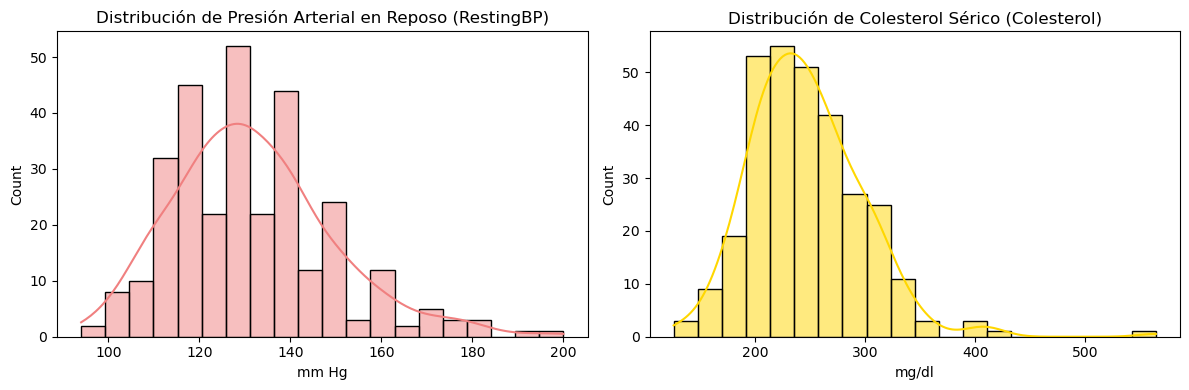

In [14]:
# 5. Presión arterial en reposo (RestingBP) y Colesterol
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(all_data["presion_reposo"], bins=20, kde=True, ax=axes[0], color="lightcoral")
axes[0].set_title("Distribución de Presión Arterial en Reposo (RestingBP)")
axes[0].set_xlabel("mm Hg")

sns.histplot(all_data["colesterol"], bins=20, kde=True, ax=axes[1], color="gold")
axes[1].set_title("Distribución de Colesterol Sérico (Colesterol)")
axes[1].set_xlabel("mg/dl")

plt.tight_layout()
plt.show()

La distribución de presión arterial en reposo (RestingBP) se concentra entre 120–140 mmHg, con forma aproximadamente normal y ligera asimetría a la derecha.

La distribución de colesterol sérico muestra asimetría positiva: la mayor densidad está alrededor de 200–250 mg/dL y se observan valores atípicos altos (≥400–500 mg/dL).

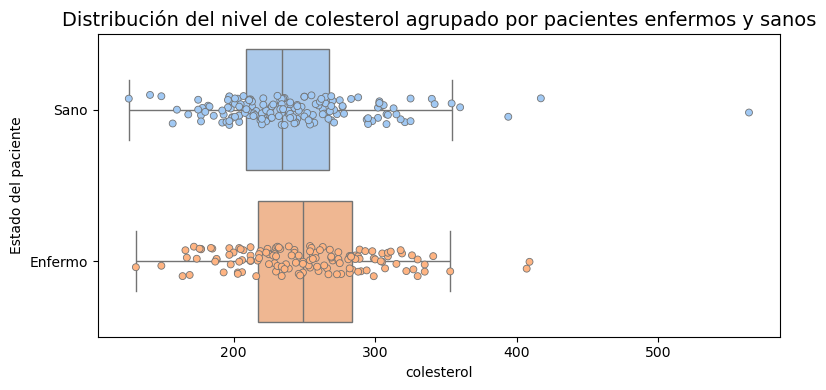

In [15]:
# 6) Distribución del nivel de colesterol
plt.figure(figsize=(8, 4))
sns.boxplot(y = 'enfermedad_cardiaca', x = 'colesterol', data = all_data, palette="pastel", fliersize = 0, orient = 'h')
sns.stripplot(y = 'enfermedad_cardiaca', x = 'colesterol', data = all_data, linewidth = 0.6, palette="pastel", orient = 'h')
plt.yticks( np.arange(2), ['Sano', 'Enfermo'])
plt.title('Distribución del nivel de colesterol agrupado por pacientes enfermos y sanos',fontsize= 14)
plt.ylabel('Estado del paciente')
plt.tight_layout()

Podemos observar que la dispersión de ambas clases con respecto al nivel de colesterol es similar , presnetando en ambos casos valores atipicos.

Es interesante ver que ese paciente que tiene nivel de colesterol muy elevado (mayor a 500) hace parte del grupo de los sanos.

Todo esto indicaria que la variable de colesterol sola no separa bien las clases, por lo que se podria asumir que el efecto no es enorme.

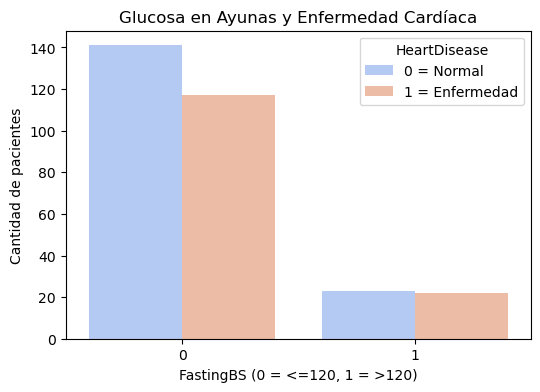

In [16]:
# 6. Glucosa en ayunas (FastingBS) vs HeartDisease
plt.figure(figsize=(6,4))
sns.countplot(x="azucar_ayunas", hue="enfermedad_cardiaca", data=all_data, palette="coolwarm")
plt.title("Glucosa en Ayunas y Enfermedad Cardíaca")
plt.xlabel("FastingBS (0 = <=120, 1 = >120)")
plt.ylabel("Cantidad de pacientes")
plt.legend(title="HeartDisease", labels=["0 = Normal", "1 = Enfermedad"])
plt.show()

La mayoría de los pacientes presenta niveles de glucosa en ayunas dentro del rango normal (≤120 mg/dl), mostrando una distribución relativamente equilibrada entre quienes padecen y no padecen enfermedad cardíaca, aunque con un ligero predominio de casos normales. Sin embargo, en el grupo con glucosa elevada (>120 mg/dl) se observa una clara y desproporcionada mayor prevalencia de diagnósticos cardíacos, lo que confirma la hiperglucemia como un significativo factor de riesgo metabólico directamente asociado a la enfermedad cardiovascular.

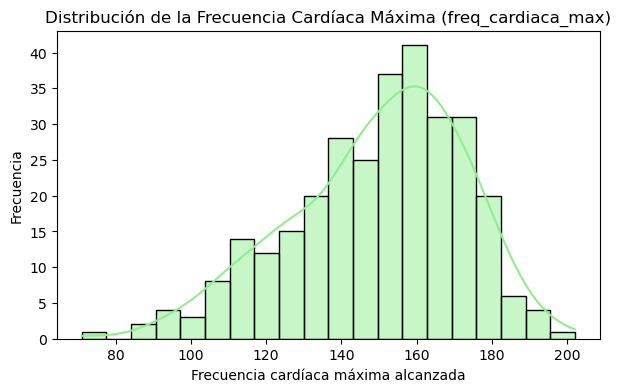

In [17]:
# 7. Frecuencia cardíaca máxima (MaxHR)
plt.figure(figsize=(7,4))
sns.histplot(all_data["freq_cardiaca_max"], bins=20, kde=True, color="lightgreen")
plt.title("Distribución de la Frecuencia Cardíaca Máxima (freq_cardiaca_max)")
plt.xlabel("Frecuencia cardíaca máxima alcanzada")
plt.ylabel("Frecuencia")
plt.show()

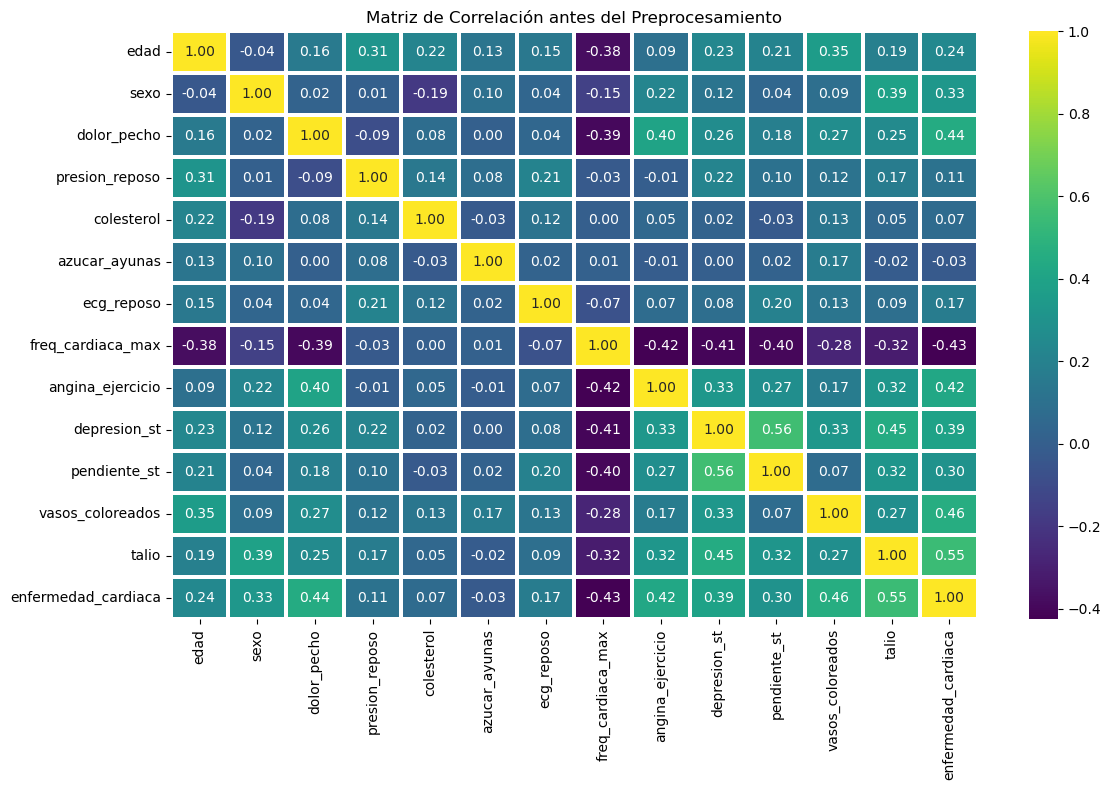

In [21]:
X = all_data.drop("enfermedad_cardiaca", axis=1)  # Features
y = all_data["enfermedad_cardiaca"]               # Target



# Calculamos la matriz de correlación
corr_before = df_train_temp.corr(numeric_only=True)

# Graficamos el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_before, annot=True, linewidths=1.5, fmt=".2f", cmap='viridis')
plt.title("Matriz de Correlación antes del Preprocesamiento")
plt.tight_layout()
plt.show()

## Etapa 1: Preprocesamiento y detección de data leakage

En esta primera etapa se busca demostrar el efecto del data leakage (fuga de información) durante el entrenamiento de un modelo de machine learning.
Para ello, se implementa la estructura de un pipeline con fuga y sin fuga de datos, utilizando el modelo `SVC` (**Support Vector Classifier**) como modelo base.

El objetivo es comparar el desempeño de ambos enfoques mediante la métrica AUC (Área bajo la curva ROC), evidenciando cómo el modelo con fuga presenta un rendimiento artificialmente alto, mientras que el pipeline correctamente estructurado refleja un resultado más realista y generalizable.


::: {.callout-note}
### Nota
Para efectos prácticos del ejercicio, se introducirá una **variable artificial** diseñada para simular una **fuga de información (data leakage)**.  
Esta variable estará correlacionada con la variable objetivo, lo que permitirá evidenciar cómo un modelo puede obtener **métricas artificialmente elevadas** cuando se entrena con datos contaminados.
:::


In [ ]:
# ============================================================
# ETAPA 1: Preprocesamiento y detección de Data Leakage
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# ============================================================
# Dataset limpio (ya generado en el EDA)
# ============================================================

X = all_data.drop("enfermedad_cardiaca", axis=1)
y = all_data["enfermedad_cardiaca"]

# ============================================================
# Función general reutilizable (para etapa 2 también)
# ============================================================

def train_pipeline(X_train, y_train, model, param_grid, use_pipeline=True):
    """
    Entrena un modelo usando GridSearchCV.
    Si use_pipeline=True, aplica el escalado dentro del pipeline (sin data leakage).
    Si use_pipeline=False, se asume que los datos ya fueron escalados fuera (con posible fuga).
    """

    if use_pipeline:
        pipe = Pipeline([
            ("scaler", MinMaxScaler()),
            ("clf", model)
        ])
        grid = GridSearchCV(pipe, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
        grid.fit(X_train, y_train)
        return grid
    else:
        grid = GridSearchCV(model, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
        grid.fit(X_train, y_train)
        return grid


# ============================================================
# Configuración del modelo base (SVC)
# ============================================================

svc = SVC(probability=True)

param_grid_base = {
    "C": [0.1, 1, 10],
    "gamma": [0.01, 0.1, 1],
    "kernel": ["rbf", "linear"]
}

# ============================================================
# División de datos
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================================
# CASO 1: Con fuga de datos
# ============================================================

# Creamos una copia que sí tenga la variable "fuga_artificial"
X_leaky = X.copy()
np.random.seed(42)
X_leaky["fuga_artificial"] = y + np.random.normal(0, 0.3, size=len(y))  # ruido moderado

# Escalado antes del split (provoca fuga)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_leaky)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Entrenando modelo con fuga de datos...")
leaky_model = train_pipeline(X_train_l, y_train_l, svc, param_grid_base, use_pipeline=False)
leaky_auc = roc_auc_score(y_test_l, leaky_model.predict_proba(X_test_l)[:, 1])

# ============================================================
# CASO 2: Sin fuga de datos (Pipeline correcto)
# ============================================================

param_grid_safe = {
    "clf__C": [0.1, 1, 10],
    "clf__gamma": [0.01, 0.1, 1],
    "clf__kernel": ["rbf", "linear"]
}

print("\nEntrenando modelo sin fuga de datos (Pipeline correcto)...")
safe_model = train_pipeline(X_train, y_train, svc, param_grid_safe, use_pipeline=True)
safe_auc = roc_auc_score(y_test, safe_model.predict_proba(X_test)[:, 1])

# ============================================================
# Resultados
# ============================================================

print("\n==================== RESULTADOS ====================")
print(f"Modelo con fuga: AUC = {leaky_auc:.3f}")
print(f"Modelo limpio:   AUC = {safe_auc:.3f}")
print("=====================================================")


Entrenando modelo con fuga de datos...

Entrenando modelo sin fuga de datos (Pipeline correcto)...

==================== RESULTADOS ====================
Modelo con fuga: AUC = 0.989
Modelo limpio:   AUC = 0.933


Como podemos observar, el AUC en el caso con fuga de datos es ligeramente mayor que en el modelo sin fuga. 

Sin embargo, debido a la naturaleza de nuestro conjunto de datos, esta diferencia no es muy marcada. La mayoría de las variables son categóricas y presentan poca varianza, lo que reduce el impacto de la fuga artificial introducida.

Además, el modelo base utilizado fue **SVC**, el cual no se limita a capturar únicamente relaciones lineales. Este modelo, gracias a su kernel RBF, es capaz de detectar interacciones no lineales entre variables con correlaciones moderadas y amplificar su efecto en la predicción.

Como se evidenció en la matriz de correlación, variables como dolor_pecho, angina_ejercicio y freq_cardiaca_max muestran correlaciones moderadas con la variable objetivo. Aunque individualmente no sean determinantes, combinadas aportan una señal predictiva significativa que el modelo **SVC** puede aprovechar.

Por esta razón, la diferencia entre ambos escenarios (con y sin fuga) no resulta drástica. Si se empleara un modelo lineal, como **logistic regression**, sería más probable observar una caída más evidente en el rendimiento, ya que este tipo de modelos no puede capturar las interacciones complejas presentes en los datos.